### MapMyRun Data

Import Packages

In [2]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [3]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Netflix%20Project/Data/CONTENT_INTERACTION/ViewingActivity.csv')
temp.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States)
1,Dad,2022-05-18 04:31:07,00:50:33,NaN,Ozark: Season 4: Trouble The Water (Episode 12),NaN,Amazon FTVET31DOVI2020 Smart TV,00:50:38,00:50:38,US (United States)


In [5]:
temp['Start Time'] = pd.to_datetime(temp['Start Time'])
temp['day_of_week']=temp['Start Time'].dt.day_name()
temp.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,day_of_week
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),Wednesday
1,Dad,2022-05-18 04:31:07,00:50:33,NaN,Ozark: Season 4: Trouble The Water (Episode 12),NaN,Amazon FTVET31DOVI2020 Smart TV,00:50:38,00:50:38,US (United States),Wednesday
2,Dad,2022-05-18 03:28:52,01:02:11,Autoplayed: user action: Unspecified;,Ozark: Season 4: Pound of Flesh and Still Kick...,NaN,Amazon FTVET31DOVI2020 Smart TV,01:02:00,01:02:00,US (United States),Wednesday
3,Dad,2022-05-18 03:28:28,00:00:12,Autoplayed: user action: None;,Season 7 Supporting Character Clip: Grace and ...,HOOK,Amazon FTVET31DOVI2020 Smart TV,00:00:12,00:00:12,US (United States),Wednesday
4,Dad,2022-05-18 03:26:33,00:01:48,Autoplayed: user action: None;,Season 1 Trailer: Welcome to Eden,TRAILER,Amazon FTVET31DOVI2020 Smart TV,00:01:48,00:01:48,US (United States),Wednesday


In [74]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

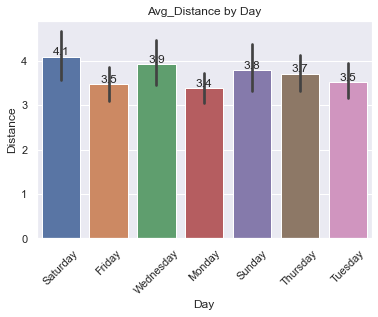

In [75]:
days = sns.barplot(x='day_of_week',y='Distance', data=df3)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')
show_values(days)

In [76]:
df3.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes',
       'day_of_week'],
      dtype='object')

Text(0.5, 1.0, 'Minutes by Distance')

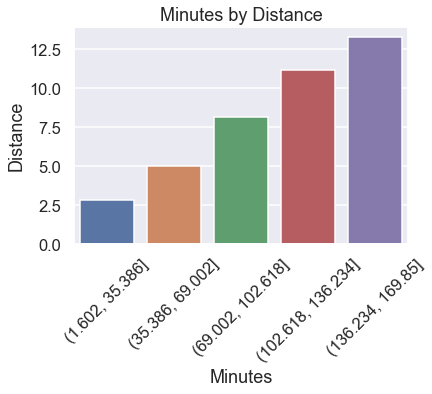

In [77]:
sns.set_context("talk")

sns.barplot(y='Distance', x=pd.cut(
    df3['Minutes'], bins = 5),
    data=df2, ci=None)

plt.ylabel('Distance')
plt.xlabel('Minutes')
plt.xticks(rotation = 45)
plt.title('Minutes by Distance')

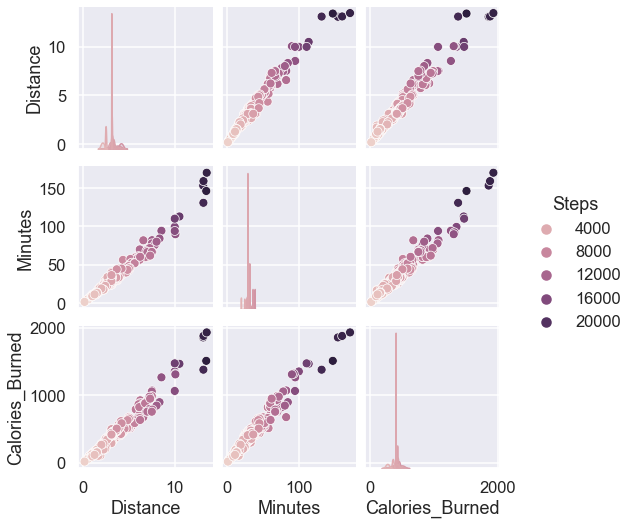

In [79]:
pairplot = df3[['Distance', 'Steps', 'Minutes', 'Calories_Burned']]
sns.pairplot(pairplot, hue='Steps')

Text(0.0, 1.2, 'Minutes by Distance')

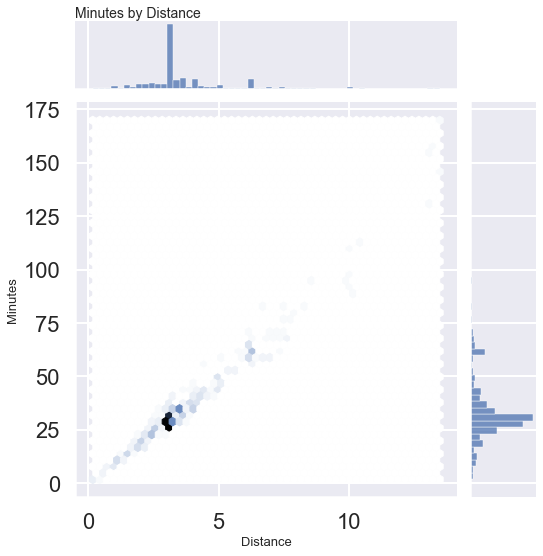

In [80]:
import matplotlib.pyplot as plt
sns.set_context("poster")
jplot = sns.jointplot(x=df3['Distance'], y=df3['Minutes'], kind='hex')
#jplot.fig.suptitle('Minutes by Steps', loc = 'right', fontsize = 14)
plt.ylabel('Minutes', fontsize = 13)
plt.xlabel('Distance', fontsize = 13)
#plt.xticks(rotation = 45)
jplot.fig.set_figwidth(9)
jplot.fig.set_figheight(9)
plt.title('Minutes by Distance', y = 1.2, loc = 'left', fontsize = 14)


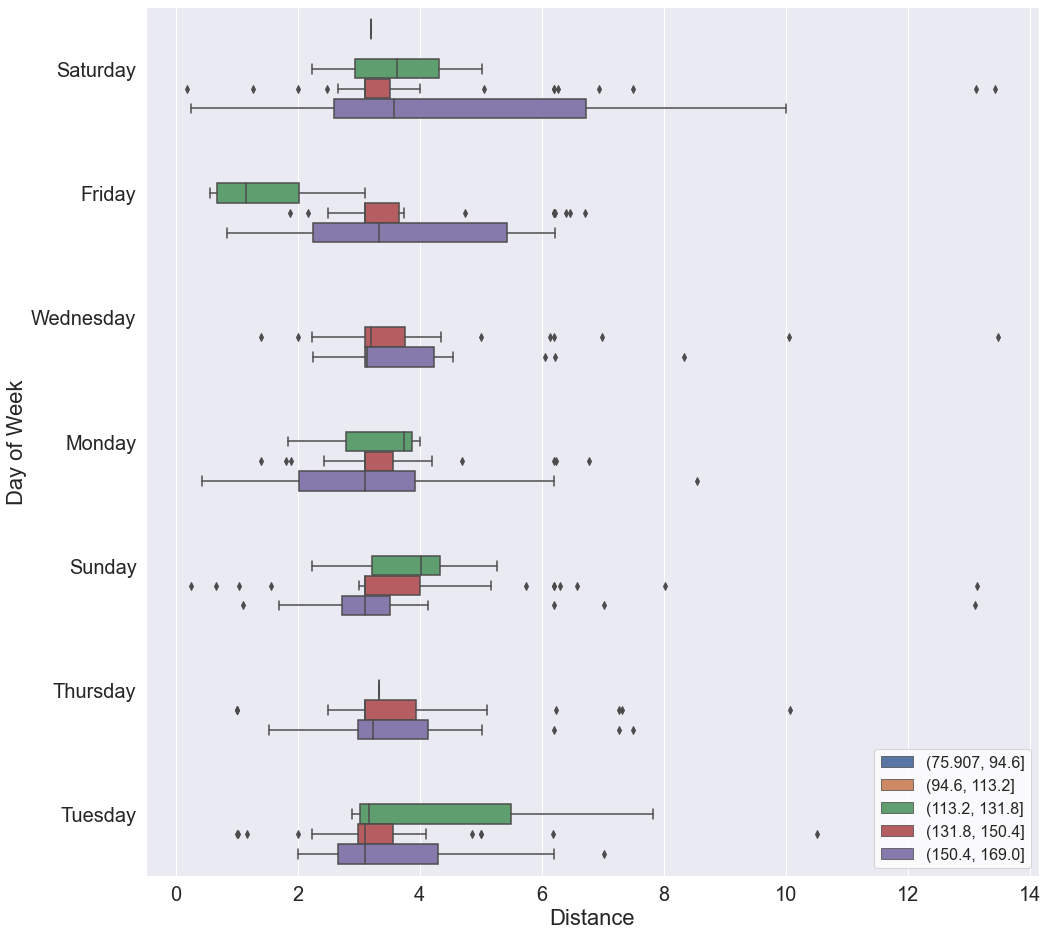

In [81]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance', y='day_of_week', data=df3, orient = 'h', hue = (pd.cut(df3['Avg_Heart_Rate'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

### Frequentist - Repeated observations in the limit.

Queueing theory - study of working with queues or lines. How much supply do we need to handle the demand (web servers for frequencies, waiters for customers at a restaurant)

Processes may have true frequencies - we are interested in modeling as many repeats of an experiment as possible. If the sample is large enough, we will have seen enough queues or lines to infer an estimate of our probabilities.

Derive the probalistic property of a procedure.

The more data we have the more confident we can be.

Apply the probability directly to the observed data.

### Bayesian - Describes parameters by probability distributions

Before seeing any data, a prior distribution is formulated. X amount of people in line at a certain time period will allow us to have an estimated guess.

Prior distributed is updated after seeing the data. Our initial estimate updates once data is introduced.

The updated data is referred to as posterior distribution.

Same math and same data - the differences is the interpretation.

In [82]:
# sns.set_style('white')
# sns.set_context('notebook')
# sns.set_palette('dark')

# f = plt.figure(figsize=(6,4))
# sns.boxplot(x='Distance', y='Avg_Heart_Rate', 
#             hue='Avg_Pace', data=df2);

<AxesSubplot:>

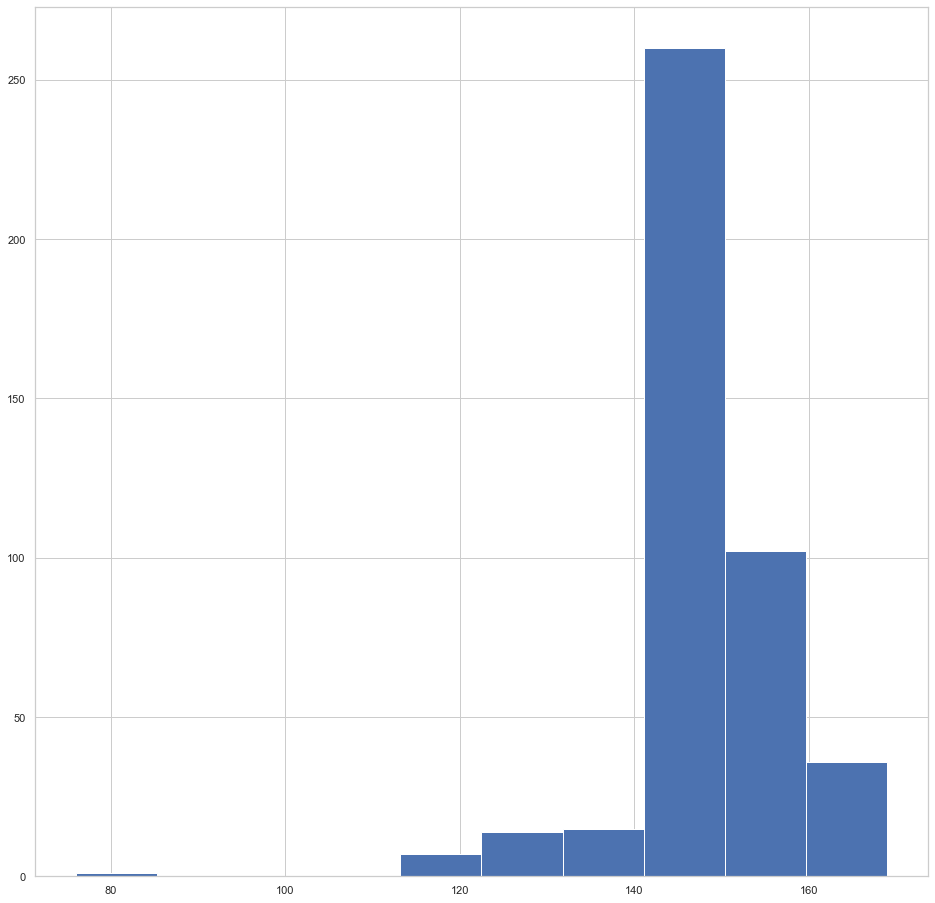

In [83]:
df3.Avg_Heart_Rate.hist()

array([[<AxesSubplot:title={'center':'Workout_Date'}>,
        <AxesSubplot:title={'center':'Calories_Burned'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Workout_Time'}>,
        <AxesSubplot:title={'center':'Avg_Pace'}>,
        <AxesSubplot:title={'center':'Avg_Speed'}>],
       [<AxesSubplot:title={'center':'Avg_Heart_Rate'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Minutes'}>]], dtype=object)

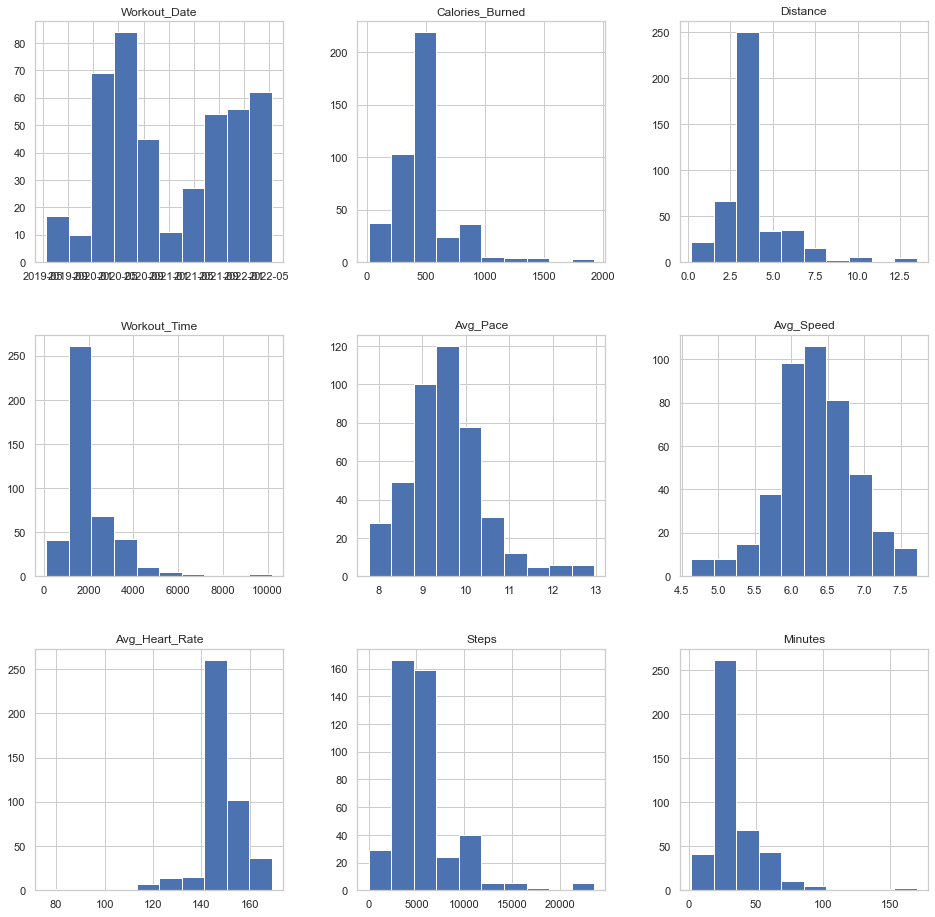

In [84]:
df3.hist()

In [85]:
from scipy.stats.mstats import normaltest
normaltest(df3.Distance.values)

NormaltestResult(statistic=217.41345470823035, pvalue=6.155568440267132e-48)

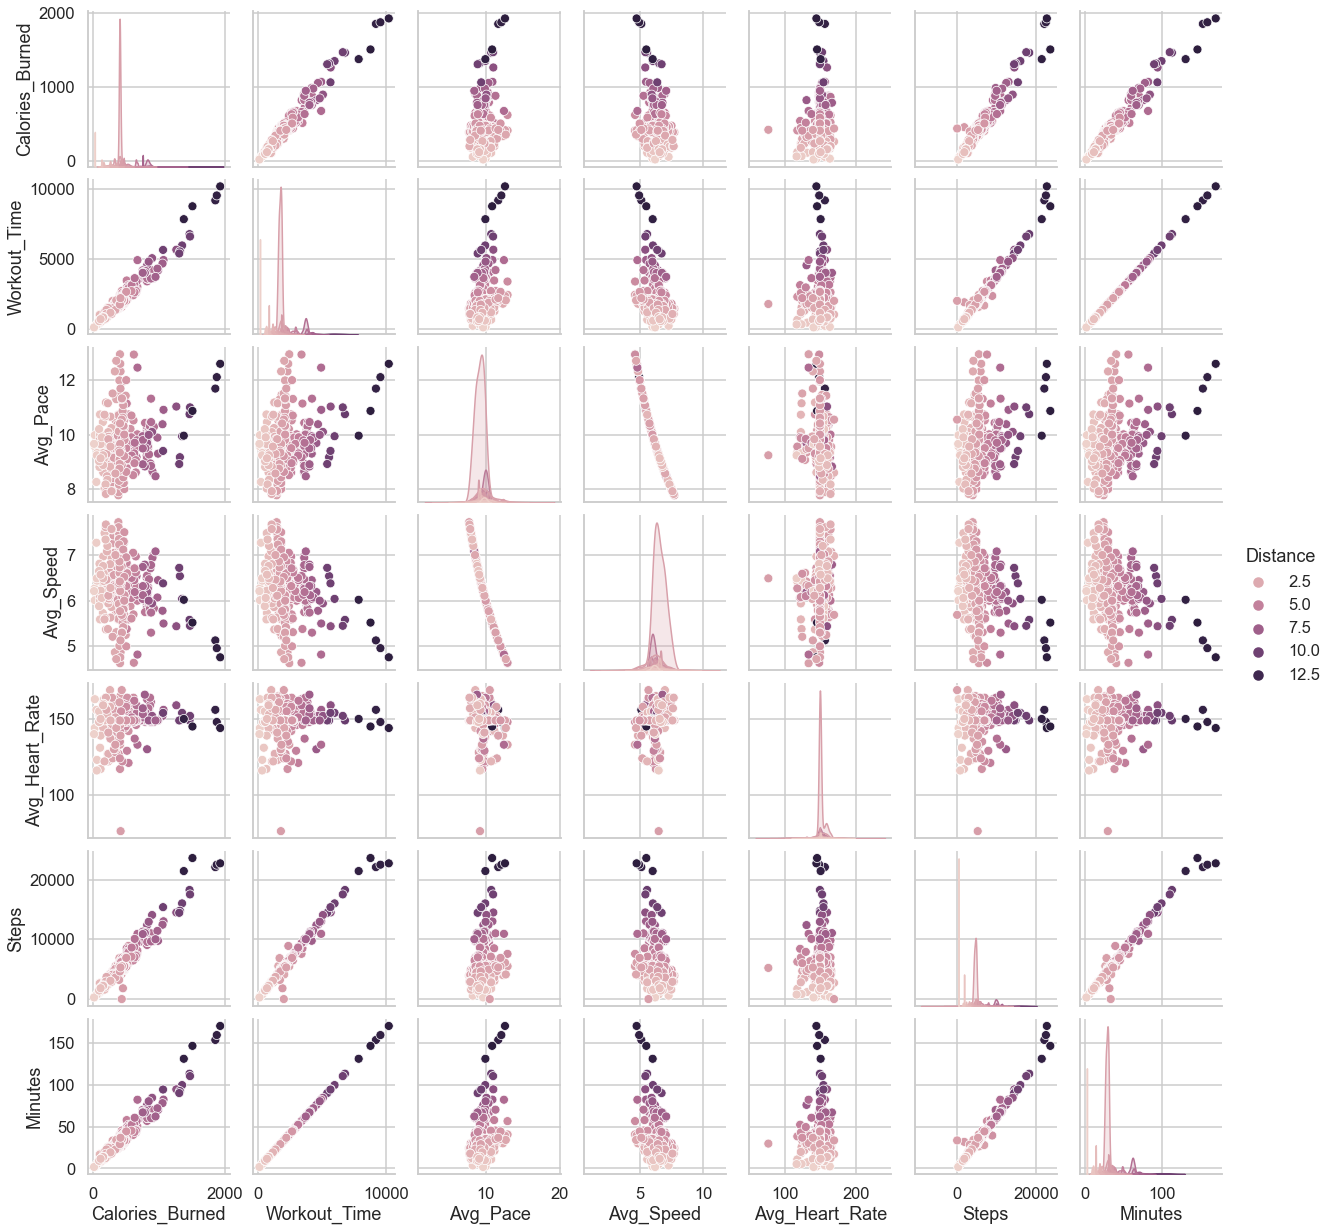

In [86]:
sns.set_context('talk')
sns.pairplot(df3, hue='Distance');

## Hypothesis Testing